In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
from pandas import json_normalize

# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('main_data.csv')
display(data.head())
data.shape

,artist,song,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Daphni,Cloudy - Kelbin Remix,0,spotify:track:4OtqragtOuKh41rBNnFXuK,0.758,0.878,11,-6.656,0,0.0549,0.3900,0.8660,0.1000,0.0668,134.019,audio_features,4OtqragtOuKh41rBNnFXuK,https://api.spotify.com/v1/tracks/4OtqragtOuKh...,https://api.spotify.com/v1/audio-analysis/4Otq...,336716,4
1,Skrillex,Rumble,84,spotify:track:1GfBLbAhZUWdseuDqhocmn,0.810,0.836,1,-7.721,0,0.0645,0.0515,0.2290,0.0598,0.0585,139.979,audio_features,1GfBLbAhZUWdseuDqhocmn,https://api.spotify.com/v1/tracks/1GfBLbAhZUWd...,https://api.spotify.com/v1/audio-analysis/1GfB...,146571,4
2,altrice,yoni,31,spotify:track:0KpuGGkI2ELoGm7J8aDQbK,0.863,0.773,11,-3.944,0,0.3400,0.4350,0.0599,0.1000,0.6620,123.339,audio_features,0KpuGGkI2ELoGm7J8aDQbK,https://api.spotify.com/v1/tracks/0KpuGGkI2ELo...,https://api.spotify.com/v1/audio-analysis/0Kpu...,336230,4
3,Junior Boys,Night Walk,23,spotify:track:1ufmBDHamjH3v8Ms1cyNsN,0.652,0.244,5,-21.979,1,0.0540,0.8320,0.9040,0.1330,0.5220,169.810,audio_features,1ufmBDHamjH3v8Ms1cyNsN,https://api.spotify.com/v1/tracks/1ufmBDHamjH3...,https://api.spotify.com/v1/audio-analysis/1ufm...,289960,4
4,Zaza,Nduzangou,0,spotify:track:261oqGIHQWXeBWoLNsnMDm,0.625,0.624,0,-7.812,0,0.1390,0.3060,0.0000,0.1350,0.7690,119.975,audio_features,261oqGIHQWXeBWoLNsnMDm,https://api.spotify.com/v1/tracks/261oqGIHQWXe...,https://api.spotify.com/v1/audio-analysis/261o...,291273,4


(1336, 21)

In [3]:
data = data.drop_duplicates(subset='uri')


In [4]:
data_clustering = data.drop(['artist', 'song', 'uri', 'id', 'type','track_href', 'analysis_url','popularity'], axis = 1)


In [5]:
data_clustering.describe().T


,count,mean,std,min,25%,50%,75%,max
danceability,1336.0,0.590815,0.183727,0.061000,0.459000,0.61100,0.73800,0.963
energy,1336.0,0.619402,0.218610,0.009780,0.475750,0.64250,0.79825,0.998
key,1336.0,5.626497,3.633038,0.000000,2.000000,6.00000,9.00000,11.000
loudness,1336.0,-10.825130,4.305466,-30.615000,-13.041000,-10.19600,-7.77275,-1.988
mode,1336.0,0.560629,0.496496,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,1336.0,0.091747,0.093635,0.024900,0.039100,0.05445,0.09295,0.792
acousticness,1336.0,0.332210,0.319649,0.000005,0.036225,0.22650,0.61300,0.995
instrumentalness,1336.0,0.345423,0.382203,0.000000,0.000560,0.09360,0.78925,0.996
liveness,1336.0,0.180737,0.150538,0.009970,0.091775,0.11750,0.21600,0.984
valence,1336.0,0.555855,0.262149,0.028400,0.358000,0.58400,0.77325,0.984


In [6]:
data_clustering = data_clustering.drop(['mode'], axis = 1)


In [7]:
data_clustering.to_csv("data_clustering.csv", index = False)


In [8]:
#Scaling the model

In [9]:

# The scale of "proline" is much higher than the scale of many other variables!
# K-Means is a distance based algorithm: we need to scale / normalize:

from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(data_clustering)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=data_clustering.columns).head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.910303,1.183364,1.479620,0.968697,-0.393671,0.180860,1.362555,-0.536524,-1.866257,0.542755,0.126173,0.215973
1,1.193437,0.991169,-1.273928,0.721244,-0.291107,-0.878509,-0.304725,-0.803666,-1.897930,0.774747,-0.877016,0.215973
2,1.482016,0.702877,1.479620,1.598830,2.652283,0.321692,-0.747326,-0.536524,0.405056,0.127037,0.123609,0.215973
3,0.333145,-1.717863,-0.172509,-2.591600,-0.403287,1.564143,1.462016,-0.317228,-0.129191,1.935916,-0.120508,0.215973
4,0.186133,0.021043,-1.549283,0.700100,0.504837,-0.082026,-0.904108,-0.303937,0.813374,-0.003906,-0.113580,0.215973


In [ ]:
# KMeans

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

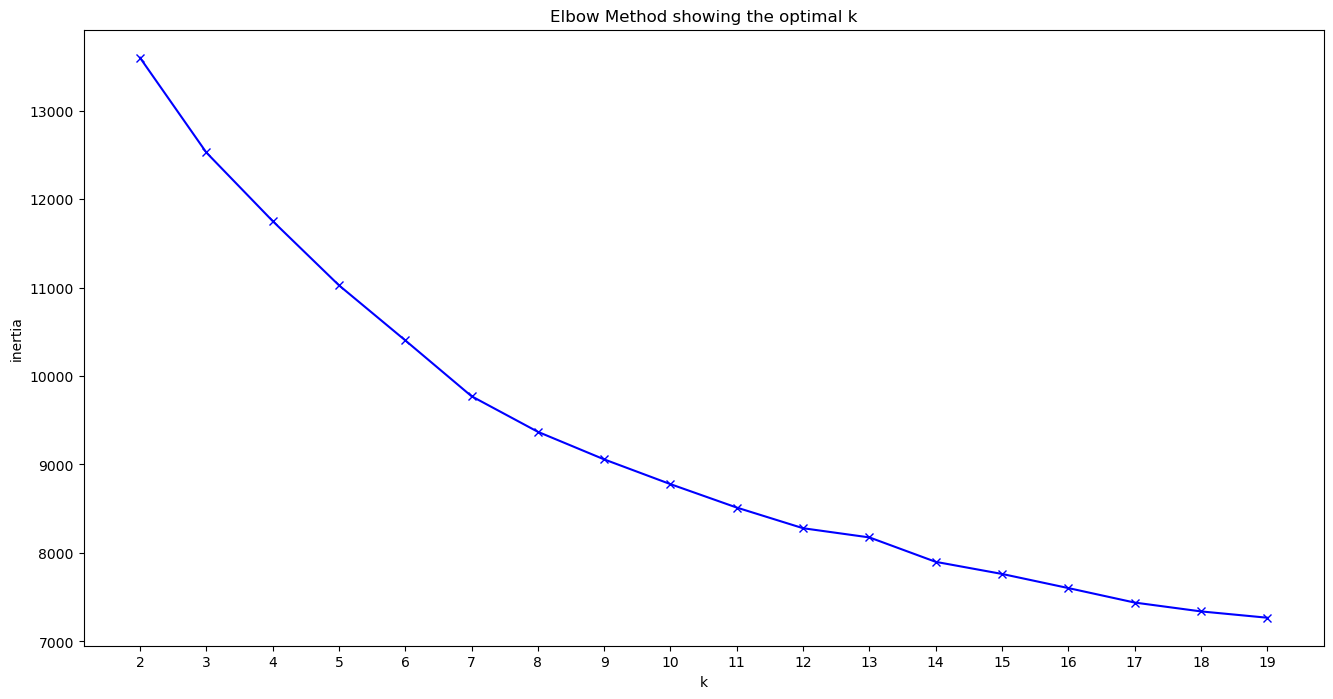

In [13]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

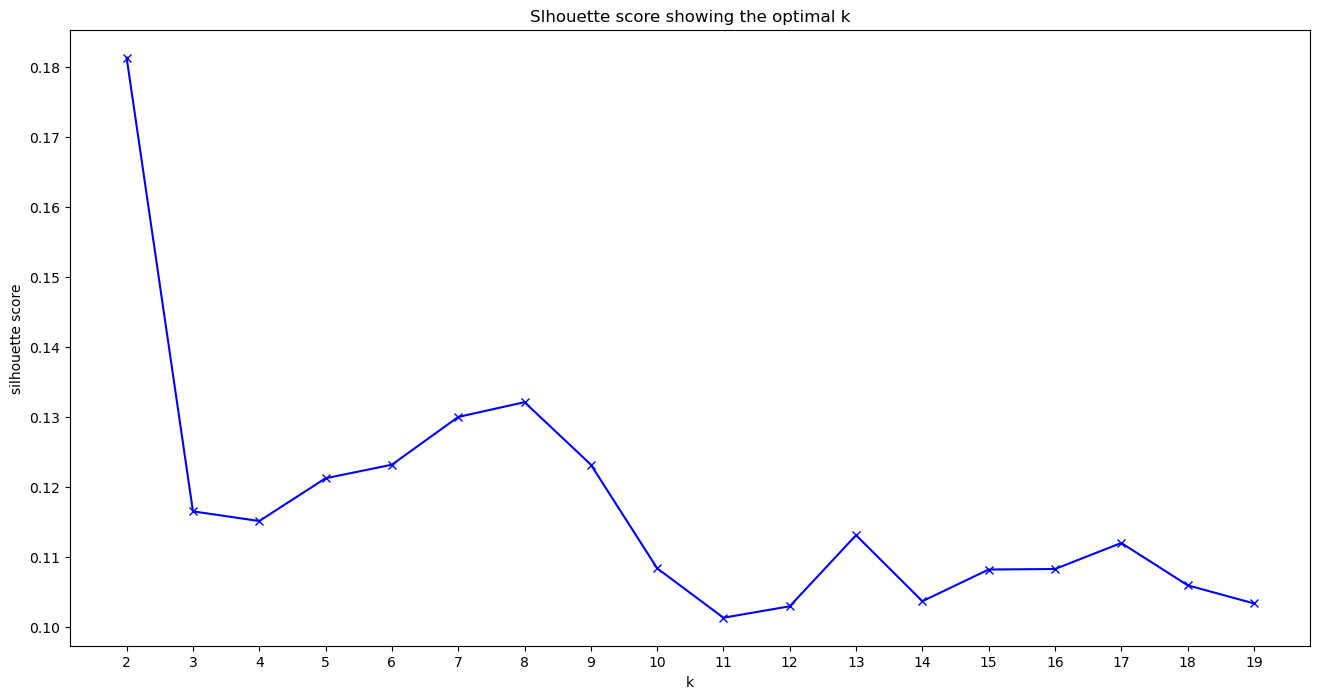

In [14]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [15]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=10, random_state=1234)

In [16]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    107
1     92
2    194
3    107
4    237
5    200
6     14
7    135
8     36
9    214
dtype: int64

In [18]:
print(len(clusters))
clusters


1336


array([9, 7, 0, ..., 9, 9, 4], dtype=int32)

In [19]:
data = data.assign(clusters = clusters)
data

,artist,song,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,clusters
0,Daphni,Cloudy - Kelbin Remix,0,spotify:track:4OtqragtOuKh41rBNnFXuK,0.758,0.878,11,-6.656,0,0.0549,0.39000,0.8660,0.1000,0.0668,134.019,audio_features,4OtqragtOuKh41rBNnFXuK,https://api.spotify.com/v1/tracks/4OtqragtOuKh...,https://api.spotify.com/v1/audio-analysis/4Otq...,336716,4,9
1,Skrillex,Rumble,84,spotify:track:1GfBLbAhZUWdseuDqhocmn,0.810,0.836,1,-7.721,0,0.0645,0.05150,0.2290,0.0598,0.0585,139.979,audio_features,1GfBLbAhZUWdseuDqhocmn,https://api.spotify.com/v1/tracks/1GfBLbAhZUWd...,https://api.spotify.com/v1/audio-analysis/1GfB...,146571,4,7
2,altrice,yoni,31,spotify:track:0KpuGGkI2ELoGm7J8aDQbK,0.863,0.773,11,-3.944,0,0.3400,0.43500,0.0599,0.1000,0.6620,123.339,audio_features,0KpuGGkI2ELoGm7J8aDQbK,https://api.spotify.com/v1/tracks/0KpuGGkI2ELo...,https://api.spotify.com/v1/audio-analysis/0Kpu...,336230,4,0
3,Junior Boys,Night Walk,23,spotify:track:1ufmBDHamjH3v8Ms1cyNsN,0.652,0.244,5,-21.979,1,0.0540,0.83200,0.9040,0.1330,0.5220,169.810,audio_features,1ufmBDHamjH3v8Ms1cyNsN,https://api.spotify.com/v1/tracks/1ufmBDHamjH3...,https://api.spotify.com/v1/audio-analysis/1ufm...,289960,4,5
4,Zaza,Nduzangou,0,spotify:track:261oqGIHQWXeBWoLNsnMDm,0.625,0.624,0,-7.812,0,0.1390,0.30600,0.0000,0.1350,0.7690,119.975,audio_features,261oqGIHQWXeBWoLNsnMDm,https://api.spotify.com/v1/tracks/261oqGIHQWXe...,https://api.spotify.com/v1/audio-analysis/261o...,291273,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,Teddy Pendergrass,"The More I Get, the More I Want",0,spotify:track:2nsx3QznZwMFBPdE4PJiJJ,0.716,0.808,5,-9.491,0,0.0662,0.33500,0.0000,0.0950,0.9020,121.243,audio_features,2nsx3QznZwMFBPdE4PJiJJ,https://api.spotify.com/v1/tracks/2nsx3QznZwMF...,https://api.spotify.com/v1/audio-analysis/2nsx...,264613,4,4
1332,Todd Edwards,Saved My Life,15,spotify:track:7xR0hvWymbYc0GHSx4Jrxo,0.825,0.911,6,-3.918,0,0.0522,0.00806,0.7800,0.3270,0.9820,124.949,audio_features,7xR0hvWymbYc0GHSx4Jrxo,https://api.spotify.com/v1/tracks/7xR0hvWymbYc...,https://api.spotify.com/v1/audio-analysis/7xR0...,415730,4,9
1333,Todd Edwards,Never Far From You,8,spotify:track:076XkAjeMf7mfOgGsg3y67,0.894,0.917,6,-3.810,0,0.0904,0.04590,0.8760,0.0585,0.9270,124.995,audio_features,076XkAjeMf7mfOgGsg3y67,https://api.spotify.com/v1/tracks/076XkAjeMf7m...,https://api.spotify.com/v1/audio-analysis/076X...,400748,4,9
1334,Todd Edwards,Dancing For Heaven,6,spotify:track:0i1y9HFHPquPLLIKnxJT23,0.866,0.932,6,-4.320,1,0.0581,0.00851,0.9090,0.0628,0.9840,131.993,audio_features,0i1y9HFHPquPLLIKnxJT23,https://api.spotify.com/v1/tracks/0i1y9HFHPquP...,https://api.spotify.com/v1/audio-analysis/0i1y...,349624,4,9


In [20]:
data[data['clusters'] == 5]


,artist,song,popularity,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature,clusters
3,Junior Boys,Night Walk,23,spotify:track:1ufmBDHamjH3v8Ms1cyNsN,0.652,0.2440,5,-21.979,1,0.0540,0.832,0.9040,0.1330,0.522,169.810,audio_features,1ufmBDHamjH3v8Ms1cyNsN,https://api.spotify.com/v1/tracks/1ufmBDHamjH3...,https://api.spotify.com/v1/audio-analysis/1ufm...,289960,4,5
6,LaRhonda LeGette,Thou Art With Me,13,spotify:track:3BN1Cwn8Z8JxvWIzq9nE7A,0.395,0.3380,9,-12.271,0,0.0306,0.880,0.4610,0.1680,0.077,80.017,audio_features,3BN1Cwn8Z8JxvWIzq9nE7A,https://api.spotify.com/v1/tracks/3BN1Cwn8Z8Jx...,https://api.spotify.com/v1/audio-analysis/3BN1...,107853,4,5
8,Joel Vandroogenbroeck,Fairy Tale,17,spotify:track:2b8UOiBgWEaqNxHzj40oai,0.728,0.0850,4,-25.631,0,0.2330,0.925,0.8310,0.0992,0.753,142.199,audio_features,2b8UOiBgWEaqNxHzj40oai,https://api.spotify.com/v1/tracks/2b8UOiBgWEaq...,https://api.spotify.com/v1/audio-analysis/2b8U...,180279,4,5
10,Daphni,Arp Blocks,35,spotify:track:16nMtzomkigsObsp4d4Dvv,0.857,0.0986,10,-20.584,1,0.1170,0.989,0.1210,0.1180,0.451,126.103,audio_features,16nMtzomkigsObsp4d4Dvv,https://api.spotify.com/v1/tracks/16nMtzomkigs...,https://api.spotify.com/v1/audio-analysis/16nM...,129865,4,5
21,Captain Beefheart & His Magic Band,Observatory Crest,41,spotify:track:0FQcRQEGbJjNny5G0A2hle,0.640,0.4050,7,-14.358,1,0.0441,0.679,0.6520,0.1150,0.587,95.119,audio_features,0FQcRQEGbJjNny5G0A2hle,https://api.spotify.com/v1/tracks/0FQcRQEGbJjN...,https://api.spotify.com/v1/audio-analysis/0FQc...,212907,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1308,Gong,Love Is How You Make It - 2015 Remaster,11,spotify:track:1f9mUCRfDWwHoHXk7bbKWB,0.503,0.4270,11,-13.956,1,0.0435,0.654,0.0216,0.0719,0.469,117.589,audio_features,1f9mUCRfDWwHoHXk7bbKWB,https://api.spotify.com/v1/tracks/1f9mUCRfDWwH...,https://api.spotify.com/v1/audio-analysis/1f9m...,207533,4,5
1315,James Dashow,"Oedipus Orca - Theme From ""Oedipus Orca""",31,spotify:track:4L3V6gIlLrApJh3nCf2XLY,0.418,0.6550,1,-18.576,1,0.1560,0.622,0.8970,0.0948,0.564,83.611,audio_features,4L3V6gIlLrApJh3nCf2XLY,https://api.spotify.com/v1/tracks/4L3V6gIlLrAp...,https://api.spotify.com/v1/audio-analysis/4L3V...,138693,4,5
1317,James Tatum,Alleluia,2,spotify:track:1JF3nzgACt8hTdOUhx5RdH,0.270,0.3140,7,-15.629,0,0.0316,0.889,0.5160,0.0991,0.277,103.883,audio_features,1JF3nzgACt8hTdOUhx5RdH,https://api.spotify.com/v1/tracks/1JF3nzgACt8h...,https://api.spotify.com/v1/audio-analysis/1JF3...,243447,4,5
1318,James Tatum,Lord Have Mercy,5,spotify:track:3D1uRaQDt2i8pbiAtV8kR2,0.306,0.1500,9,-18.007,0,0.0358,0.903,0.1980,0.0874,0.137,138.880,audio_features,3D1uRaQDt2i8pbiAtV8kR2,https://api.spotify.com/v1/tracks/3D1uRaQDt2i8...,https://api.spotify.com/v1/audio-analysis/3D1u...,381497,4,5


In [22]:
data.to_csv("data_recommender.csv", index = False)
